In [19]:
import os
import cv2
import numpy as np
import imageio
from IPython.display import Image, display

In [24]:
# Helper Function: Compute HOG Descriptor
def compute_hog(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    hog_descriptor = hog.compute(gray_frame)
    return hog_descriptor

def save_video(frames, output_path, fps=30, codec='XVID'):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*codec)
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    for frame in frames:
        out.write(frame)
    
    out.release()

In [36]:
import os
import cv2
import numpy as np

# Step 1: Create Directory Structure
def create_directory_structure(base_dir, class_names):
    for class_name in class_names:
        os.makedirs(os.path.join(base_dir, class_name), exist_ok=True)

# Step 2: Load Videos and Process Frames
def process_videos(input_dir, output_dir, threshold=0.8):
    class_names = os.listdir(input_dir)
    create_directory_structure(output_dir, class_names)
    
    for class_name in class_names:
        print(f"Processing {class_name}")
        
        class_input_path = os.path.join(input_dir, class_name)
        class_output_path = os.path.join(output_dir, class_name)
        
        for video_name in os.listdir(class_input_path):
            
            video_path = os.path.join(class_input_path, video_name)
            cap = cv2.VideoCapture(video_path)
            
            if not cap.isOpened():
                print(f"Error opening video file {video_path}")
                continue
            
            selected_frames = []
            ret, prev_frame = cap.read()
            
            if not ret:
                print(f"Error reading first frame of {video_path}")
                continue
            
            prev_hog = compute_hog(prev_frame)
            selected_frames.append(prev_frame)
            
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                
                current_hog = compute_hog(frame)
                if np.linalg.norm(prev_hog - current_hog) > threshold:
                    selected_frames.append(frame)
                    prev_hog = current_hog
            
            cap.release()
            save_video(selected_frames, os.path.join(class_output_path, video_name.replace('.mp4', '.avi')))
            print(f"Processed {video_name}")
            break
        break

def compute_hog(frame):
    hog = cv2.HOGDescriptor()
    h = hog.compute(frame)
    return h

def save_video(frames, output_path, fps=30, codec='XVID'):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*codec)
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    for frame in frames:
        out.write(frame)
    
    out.release()

In [37]:
# Function to generate GIF from video
def generate_gif(video_path, gif_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
    
    cap.release()
    imageio.mimsave(gif_path, frames, fps=10)

In [38]:
# Paths
input_dir = '../data/raw/UCF50'
output_dir = '../data/preprocessed/HOG'
video_name = 'v_Mixing_g25_c04.avi'
class_name = 'Mixing'  # Adjust this to the correct class name

# Display Original Video
original_video_path = os.path.join(input_dir, class_name, video_name)

# Process the Video
process_videos(input_dir, output_dir, threshold=0.5)

# Display Processed Video
processed_video_path = os.path.join(output_dir, class_name, video_name.replace('.mp4', '.avi'))

# Compute and display the size of the original and processed videos
original_video_size = os.path.getsize(original_video_path)
processed_video_size = os.path.getsize(processed_video_path)
print(f"Size of the original video: {original_video_size / (1024 * 1024):.2f} MB")
print(f"Size of the processed video: {processed_video_size / (1024 * 1024):.2f} MB")

Processing Mixing
Processed v_Mixing_g25_c04.avi
Size of the original video: 0.28 MB
Size of the processed video: 0.30 MB


Displaying Original GIF


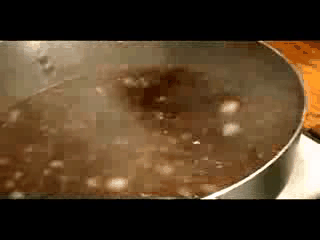

In [34]:
# Generate GIF from Original Video
original_gif_path = original_video_path.replace('.avi', '_original.gif')
generate_gif(original_video_path, original_gif_path)


# Display GIFs in Notebook
print("Displaying Original GIF")
display(Image(filename=original_gif_path))

In [35]:
# Generate GIF from Processed Video
processed_gif_path = processed_video_path.replace('.avi', '.gif')
generate_gif(processed_video_path, processed_gif_path)


print("Displaying Processed GIF")
display(Image(filename=processed_gif_path))

ValueError: need at least one array to stack